# Superhero Analysis

[1. Explore the data](#1.- Explore the data)
[2. Extracting Numeric and Categorical Coulmns](#2.-Extracting Numeric and Categorical Coulmns)

#import libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import plotly
import plotly.graph_objs as go
from plotly.offline import *
from sklearn.impute import SimpleImputer
#for Imputing Null Values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [172]:
import os
os.chdir("C://Users//Aayus//Downloads//")

In [173]:
#pwd

In [174]:
# Read the dataset

df_heroes = pd.read_csv("C://Users//Aayus//Downloads/heroes_information.csv")
df_super_powers = pd.read_csv("C://Users//Aayus//Downloads/super_hero_powers.csv")

## 1. Explore the data

In [175]:
# shape of the datasets

def data_description(df, name):
    print ("The {} dataset has {} rows and {} columns".format(name,df.shape[0],df.shape[1]))

In [176]:
data_description(df_heroes,"heroes_information ->")
data_description(df_super_powers,"super_heroes_powers ->")


The heroes_information -> dataset has 734 rows and 11 columns
The super_heroes_powers -> dataset has 667 rows and 168 columns


In [271]:
# data types used in dataset
def data_types(df):
    print (df.dtypes.value_counts())

In [272]:
data_types(df_heroes)


object     7
float64    2
int64      1
dtype: int64


In [273]:
data_types(df_super_powers)

bool      167
object      1
dtype: int64


# 2. Extracting Numeric and Categorical Coulmns

In [274]:
def extract_type_cols(df):
    """This functions extracts numeric, categorical , datetime and boolean column types.
    Returns 4 lists with respective column types"""
    num_cols_list = [i for i in df.columns if df[i].dtype in ['int64','float64']]
    cat_cols_list = [i for i in df.columns if df[i].dtype in ['object']]
    date_cols_list = [i for i in df.columns if df[i].dtype in ['datetime64[ns]']]
    bool_cols_list = [i for i in df.columns if df[i].dtype in ['bool']]
    print ("Numeric Columns:", len(num_cols_list))
    print ("Categorical/Character Columns:", len(cat_cols_list))
    print ("Date Columns:",len(date_cols_list))
    print ("Boolean Columns:",len(bool_cols_list))
    return(num_cols_list,cat_cols_list,date_cols_list,bool_cols_list)

In [275]:
extract_type_cols(df_heroes)


Numeric Columns: 3
Categorical/Character Columns: 7
Date Columns: 0
Boolean Columns: 0


(['Height', 'Weight', 'Human'],
 ['name',
  'Gender',
  'Eye color',
  'Race',
  'Hair color',
  'Publisher',
  'Alignment'],
 [],
 [])

In [276]:
#extract_type_cols(df_super_powers)
df_super_powers_num_cols_list,df_super_powers_cat_cols_list,df_super_powers_date_cols_list,df_super_powers_bool_cols_list = extract_type_cols(df_super_powers)

Numeric Columns: 0
Categorical/Character Columns: 1
Date Columns: 0
Boolean Columns: 167


In [277]:
def plot_bar(x,y,title,color):
    trace =go.Bar(
            x=x,
            y=y,text = y,textposition = 'auto',
            marker=dict(
                color=color,
                line=dict(
                    color='black',
                    width=1.5),
            ),
            opacity=0.9
    )
    data = [trace]
    layout = go.Layout(title =title)
    fig = go.Figure(data= data,layout = layout)
    iplot(fig)

In [278]:
colors = ['rgb(237,29,36)',
         'rgb(170,20,40)',
         'rgb(170,5,5)',
         'rgb(185,125,16)',
         'rgb(103,199,235)',
         'rgb(251,202,3)',
         'rgb(3,173,233)',
         'rgb(254,88,22)']

In [279]:
num_cols_list,cat_cols_list,date_cols_list,bool_cols_list = extract_type_cols(df_heroes)

Numeric Columns: 3
Categorical/Character Columns: 7
Date Columns: 0
Boolean Columns: 0


In [280]:
cat_cols_list = [i for i in df_heroes.columns if df_heroes[i].dtype in ['object']]

for i in enumerate(cat_cols_list):
    if i[1] != 'name':
        x = df_heroes[i[1]].value_counts().index
        y = df_heroes[i[1]].value_counts()
        plot_bar(x,y,title = "Distribution of {} column".format(i[1]),color = colors[i[0]])

In [281]:
df_heroes.Race.value_counts()

Human                208
Mutant                63
God / Eternal         14
Human / Radiation     11
Cyborg                11
                    ... 
Human-Vulcan           1
Mutant / Clone         1
Rodian                 1
Icthyo Sapien          1
Bizarro                1
Name: Race, Length: 61, dtype: int64

In [282]:
df_heroes[df_heroes.Race=='Kryptonian'].name

252             Faora
277       General Zod
396            Krypto
525        Power Girl
644    Superboy-Prime
645         Supergirl
646          Superman
Name: name, dtype: object

In [283]:
df_heroes[df_heroes.Race=='God / Eternal'].name

31         Anti-Monitor
48                Atlas
79             Beyonder
90              Birdman
99          Black Flash
159      Captain Planet
160    Captain Universe
426     Man of Miracles
459     Mister Mxyzptlk
498                Odin
535                   Q
615             Spectre
647         Swamp Thing
677              Trigon
Name: name, dtype: object

In [284]:
df_heroes[df_heroes.Race=='Android'].name

19           Amazo
135       Brainiac
209           Data
377          K-2SO
445        Metallo
553    Red Tornado
651         T-1000
682         Ultron
699         Vision
Name: name, dtype: object

In [285]:
## exploring super powers

In [286]:
powers_counts = df_super_powers.iloc[:,1:].apply(lambda x : np.sum(x),axis = 0).sort_values(ascending=False).to_frame('Counts')

In [287]:
powers_counts['Percentage'] = powers_counts.Counts/len(df_heroes.name.unique())*100

In [288]:
plot_bar(x = powers_counts.head(5).index,
         y = powers_counts.head(5).Counts,
         title='Top 5 most common powers',
        color = 'rgb(000, 140, 777)')

In [289]:
rare_power = powers_counts[powers_counts.Percentage<=0.5]
rare_power = rare_power.sort_values('Percentage',ascending=True)

In [290]:
plot_bar(x = rare_power.index,
         y = rare_power.Counts,
         title='Rare powers <br> only half a percent of the super heros have these powers',
        color = 'rgb(237,29,36)')

In [291]:
## Exploring Marvel SuperHeros~~

In [198]:
df_heroes

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
...,...,...,...,...,...,...,...,...,...,...,...
729,729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,-,good,52.0
730,730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,-99.0
731,731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,-,good,57.0


In [199]:
def plot_bar_alignment_interactive():
    """This funtion asks the use for the publisher name and plots the alignemnt of super heros."""
    publisher_name = input("Enter the name of the publisher for which you want to see the Alignment Distribution: ")
    if publisher_name not in df_heroes.Publisher.tolist():
        print ("The publisher name you mentioned is not available in the hero_info tablem, please check the spelling or the name and try again.")
        plot_bar_alignment_interactive()
    else:
        alignment_df = df_heroes.Alignment[df_heroes.Publisher == publisher_name].value_counts().to_frame()
        cols_dict = {'good' : 'rgb (23, 185, 120)',
        'bad' : 'rgb (181, 0, 12)',
        'neutral' : 'rgb(169, 169, 169)'}
        color = [cols_dict[a] for a in alignment_df.index]
        plot_bar(x = alignment_df.index,
                y= alignment_df.Alignment,title = "{} Super Heroes Alignment".format(publisher_name),
                color=color)

In [200]:
#plot_bar_alignment_interactive()

In [201]:
def plot_bar_alignment(publisher_name):
    """This funtion take the name of the publisher name and plots the alignemnt of super heros."""
    if publisher_name not in df_heroes.Publisher.tolist():
        print ("The publisher name you mentioned is not available in the hero_info tablem, please check the spelling or the name and try again.")
    else:
        alignment_df = df_heroes.Alignment[df_heroes.Publisher == str(publisher_name)].value_counts().to_frame()
        cols_dict = {'good' : 'rgb (23, 185, 120)',
        'bad' : 'rgb (181, 0, 12)',
        'neutral' : 'rgb(169, 169, 169)'}
        color = [cols_dict[a] for a in alignment_df.index]
        plot_bar(x = alignment_df.index,
                y= alignment_df.Alignment,title = "{} Super Heroes Alignment".format(publisher_name),
                color=color)

## Publisher wise Sups!! 

In [202]:
import plotly.offline as py

In [203]:
publisher_count = (df_heroes.Publisher.value_counts().index)
col_names = ['Publisher', 'total_heroes', 'total_villian', 'total_neutral', 'total_unknown']
df = pd.DataFrame(columns=col_names)

for publisher in publisher_count:
    data=[]
    data.append(publisher)
    data.append(len(list(df_heroes['name'].loc[(df_heroes['Alignment']=='good') & (df_heroes['Publisher']==publisher)])))
    data.append(len(list(df_heroes['name'].loc[(df_heroes['Alignment']=='bad') & (df_heroes['Publisher']==publisher)])))
    data.append(len(list(df_heroes['name'].loc[(df_heroes['Alignment']=='neutral') & (df_heroes['Publisher']==publisher)])))
    data.append(len(list(df_heroes['name'].loc[(df_heroes['Alignment']=='unknown') & (df_heroes['Publisher']==publisher)])))
    df.loc[len(df)] = data


In [204]:
trace1 = go.Bar(
    x=list(df.Publisher),
    y=list(df.total_heroes),
    name='total_heroes'
)

trace2 = go.Bar(
    x=list(df.Publisher),
    y=list(df.total_villian),
    name='total_villians'
)

trace3 = go.Bar(
    x=list(df.Publisher),
    y=list(df.total_neutral),
    name='total_neutral'
)

trace4 = go.Bar(
    x=list(df.Publisher),
    y=list(df.total_unknown),
    name='total_unknown'
)

data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    title='Publisher-wise number Super Characters',
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='Sups!perPublisher')

In [205]:
#plot_bar_alignment("Marvel Comics")

In [206]:
df_heroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [292]:
# Encoding of nulls and surely incorrect data
#df_heroes['Weight'].replace(-99.0, np.nan, inplace=True)
#df_heroes['Height'].replace(-99.0, np.nan, inplace=True)
#df_heroes.replace('-', np.nan,inplace=True)

In [293]:
df_heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Human
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,1
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,81.0,0


In [209]:
df_heroes.isnull().sum()

Unnamed: 0      0
name            0
Gender         29
Eye color     172
Race          304
Hair color    172
Height        217
Publisher      15
Skin color    662
Alignment       7
Weight        239
dtype: int64

In [210]:
df_heroes.shape

(734, 11)

## Lets derive % of missing values 

In [211]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df_heroes.columns:
    pct_missing = np.mean(df_heroes[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
name - 0%
Gender - 4%
Eye color - 23%
Race - 41%
Hair color - 23%
Height - 30%
Publisher - 2%
Skin color - 90%
Alignment - 1%
Weight - 33%


In [212]:
## Skin color has the highest % of missing values - 90%. It is always advisable to drop cols with 90 % of missing values

In [213]:
df_heroes = df_heroes.drop('Skin color', axis=1)

In [214]:
df_heroes = df_heroes.drop('Unnamed: 0', axis=1)

In [215]:
df_heroes.head(3).T

,0,1,2
name,A-Bomb,Abe Sapien,Abin Sur
Gender,Male,Male,Male
Eye color,yellow,blue,blue
Race,Human,Icthyo Sapien,Ungaran
Hair color,No Hair,No Hair,No Hair
Height,203.0,191.0,185.0
Publisher,Marvel Comics,Dark Horse Comics,DC Comics
Alignment,good,good,good
Weight,441.0,65.0,90.0


## Lets  Merge the Heroes information and SuperPower datasets to derive some more insights

In [216]:
super_merge = df_heroes.merge(df_super_powers,left_on = 'name',right_on='hero_names')

In [217]:
super_merge['Powers_Count'] = super_merge.loc[:,df_super_powers_bool_cols_list].apply(lambda x : np.sum(x.dropna()),axis = 1)

In [218]:
super_merge['Powers_Percent'] = (super_merge['Powers_Count']/len(df_super_powers_bool_cols_list))*100


In [219]:
super_merge

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,hero_names,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Powers_Count,Powers_Percent
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0,A-Bomb,...,False,False,False,False,False,False,False,False,7,4.191617
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0,Abe Sapien,...,False,False,False,False,False,False,False,False,16,9.580838
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0,Abin Sur,...,False,False,False,False,False,False,False,False,1,0.598802
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0,Abomination,...,False,False,False,False,False,False,False,False,8,4.790419
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN,Abraxas,...,False,False,False,False,False,False,False,False,14,8.383234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,good,52.0,Yellowjacket II,...,False,False,False,False,False,False,False,False,3,1.796407
656,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,good,NaN,Ymir,...,False,False,False,False,False,False,False,False,6,3.592814
657,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,good,17.0,Yoda,...,False,False,False,False,False,False,False,False,19,11.377246
658,Zatanna,Female,blue,Human,Black,170.0,DC Comics,good,57.0,Zatanna,...,False,False,False,False,False,False,False,False,8,4.790419


In [220]:
super_merge[['name','Alignment','Publisher','Powers_Percent']].sort_values(by ='Powers_Percent',ascending=False)

#df.sort_values(by='col1', ascending=False#

,name,Alignment,Publisher,Powers_Percent
555,Spectre,good,DC Comics,29.341317
17,Amazo,bad,DC Comics,26.347305
388,Martian Manhunter,good,DC Comics,20.958084
366,Living Tribunal,neutral,Marvel Comics,20.958084
382,Man of Miracles,NaN,Image Comics,20.359281
...,...,...,...,...
540,Silk Spectre II,good,DC Comics,0.598802
539,Silk Spectre,good,DC Comics,0.598802
323,JJ Powell,good,ABC Studios,0.598802
338,Kathryn Janeway,good,Star Trek,0.598802


In [221]:
super_merge[['name','Alignment','Publisher','Powers_Percent']].sort_values(by ='Powers_Percent',ascending=True)

,name,Alignment,Publisher,Powers_Percent
94,Black Knight III,good,Marvel Comics,0.598802
355,Lady Bullseye,bad,Marvel Comics,0.598802
459,Penance II,good,Marvel Comics,0.598802
460,Penguin,bad,DC Comics,0.598802
461,Peter Petrelli,good,NBC - Heroes,0.598802
...,...,...,...,...
382,Man of Miracles,NaN,Image Comics,20.359281
366,Living Tribunal,neutral,Marvel Comics,20.958084
388,Martian Manhunter,good,DC Comics,20.958084
17,Amazo,bad,DC Comics,26.347305


## Good Sups vs Bad Sups 

In [223]:
villain = super_merge[super_merge.Alignment=='bad']
hero = super_merge[super_merge.Alignment=='good']

## Most powerfull hero vs most powerful villain

In [225]:
top_hero = hero[(hero.Powers_Percent==np.max(hero.Powers_Percent))]
print("The most powerful hero is {} and is from {}.".format(top_hero.name.values[0],top_hero.Publisher.values[0]))

The most powerful hero is Spectre and is from DC Comics.


In [226]:

top_villain = villain[(villain.Powers_Percent==np.max(villain.Powers_Percent))]
print("The most powerful villain is {} and is from {}.".format(top_villain.name.values[0],top_villain.Publisher.values[0]))

The most powerful villain is Amazo and is from DC Comics.


# Most Powerful heros in Humans

In [406]:
human_heros = hero[hero.Race =='Human']

In [229]:
female_human_heros = human_heros[human_heros.Gender == 'Female']
male_human_heros = human_heros[human_heros.Gender == 'Male']

In [230]:
female_heros = super_merge[super_merge.Gender =='Female']

In [231]:
top_female_hero = female_heros[(female_heros.Powers_Percent==np.max(female_heros.Powers_Percent))]
print("The most powerful female hero is {} and is from {}.".format(top_female_hero.name.values[0],top_female_hero.Publisher.values[0]))

The most powerful female hero is Captain Marvel and is from Marvel Comics.


## Most Powerful God

In [233]:
gods = super_merge[super_merge.Race == 'God / Eternal']

In [234]:
gods.head(2)

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,hero_names,...,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,Powers_Count,Powers_Percent
29,Anti-Monitor,Male,yellow,God / Eternal,No Hair,61.0,DC Comics,bad,NaN,Anti-Monitor,...,False,False,False,False,False,False,False,False,23,13.772455
45,Atlas,Male,blue,God / Eternal,Brown,198.0,DC Comics,bad,126.0,Atlas,...,False,False,False,False,False,False,False,False,11,6.586826


In [235]:
top_god = gods[(gods.Powers_Percent==np.max(gods.Powers_Percent))]
print("The most powerful god is {} and is from {}.".format(top_god.name.values[0],top_god.Publisher.values[0]))

The most powerful god is Spectre and is from DC Comics.


In [236]:
god_villian  = gods [gods.Alignment =='bad']

In [237]:
top_god_villain = god_villian[(god_villian.Powers_Percent==np.max(god_villian.Powers_Percent))]
print("The most powerful god villain is {}.".format(top_god_villain.name.values[0],top_god_villain.Publisher.values[0]))

The most powerful god villain is Mister Mxyzptlk.


In [238]:
human_mutant_df = super_merge[super_merge.Race.isin(['Human','Mutant'])]

human_mutant_df_alignment =human_mutant_df.groupby(['Race','Alignment']).size().reset_index()
human_mutant_df_alignment.columns = ['Race','Alignment','Counts']

good = go.Bar(x= human_mutant_df_alignment.Race[human_mutant_df_alignment.Alignment=='good'],
              y = human_mutant_df_alignment.Counts[human_mutant_df_alignment.Alignment=='good'],
              name = 'Heros')
bad = go.Bar(x= human_mutant_df_alignment.Race[human_mutant_df_alignment.Alignment=='bad'],
              y = human_mutant_df_alignment.Counts[human_mutant_df_alignment.Alignment=='bad'],name= 'Villains')
layout = go.Layout(title = "Distribution of Heros and Villains in Humans and Mutants")
data = [good,bad]
fig = go.Figure(data= data,layout = layout)
iplot(fig)

In [408]:
heros_information['Human'] = heros_information['Race'].apply(lambda i: 1 if i == 'Human' else 0)
heros_information.drop(['Unnamed: 0'], inplace=True, axis=1)
heros_information.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Human
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,1
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0,0


In [409]:
print(heros_information.columns[heros_information.isnull().any()])

Index(['Publisher', 'Weight'], dtype='object')


In [410]:
heros_information['Weight'].fillna(heros_information['Weight'].median(), inplace=True)
heros_information['Publisher'].fillna(heros_information['Publisher'].mode()[0], inplace=True)
heros_info.head()
print(heros_info.columns[heros_info.isnull().any()])

Index([], dtype='object')


In [411]:
##!pip install sklearn

In [412]:
from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.impute import SimpleImputer

In [413]:
# imputing missing values with median 
import numpy as np
from sklearn.impute import SimpleImputer
mp_median = SimpleImputer(missing_values=np.nan, strategy='median')

In [414]:
#imp = Imputer(missing_values=-99.0, strategy='median', axis=0)
heros_information["Height"]=mp_median.fit_transform(heros_information[["Height"]])
heros_information["Weight"]=mp_median.fit_transform(heros_information[["Weight"]])

In [340]:
heros_power = pd.read_csv('C://Users//Aayus//Downloads/super_hero_powers.csv')
heros_power.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### dummy variable for categorical cols

In [341]:
power_cat_columns = heros_power.columns.drop("hero_names")
heros_power_dummies = pd.get_dummies(heros_power, columns=power_cat_columns)
heros_power_dummies.head()

,hero_names,Agility_False,Agility_True,Accelerated Healing_False,Accelerated Healing_True,Lantern Power Ring_False,Lantern Power Ring_True,Dimensional Awareness_False,Dimensional Awareness_True,Cold Resistance_False,...,Phoenix Force_False,Phoenix Force_True,Molecular Dissipation_False,Molecular Dissipation_True,Vision - Cryo_False,Vision - Cryo_True,Omnipresent_False,Omnipresent_True,Omniscient_False,Omniscient_True
0,3-D Man,0,1,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
1,A-Bomb,1,0,0,1,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,Abe Sapien,0,1,0,1,1,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,Abin Sur,1,0,1,0,0,1,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,Abomination,1,0,0,1,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0


In [342]:
info_cat_columns = ['Gender', 'Eye color', 'Hair color', 'Publisher', 'Skin color', 'Alignment']
heros_info_dummies = pd.get_dummies(heros_info, columns=info_cat_columns)
heros_info_dummies.head()

,name,Race,Height,Weight,Human,Gender_-,Gender_Female,Gender_Male,Eye color_-,Eye color_amber,...,Skin color_purple,Skin color_red,Skin color_red / black,Skin color_silver,Skin color_white,Skin color_yellow,Alignment_-,Alignment_bad,Alignment_good,Alignment_neutral
0,A-Bomb,Human,203.0,441.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Abe Sapien,Icthyo Sapien,191.0,65.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Abin Sur,Ungaran,185.0,90.0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,Abomination,Human / Radiation,203.0,441.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Abraxas,Cosmic Entity,-99.0,-99.0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [343]:
heros = pd.merge(heros_info_dummies, heros_power_dummies, left_on=['name'], right_on=['hero_names'], how='inner')
heros.head()

,name,Race,Height,Weight,Human,Gender_-,Gender_Female,Gender_Male,Eye color_-,Eye color_amber,...,Phoenix Force_False,Phoenix Force_True,Molecular Dissipation_False,Molecular Dissipation_True,Vision - Cryo_False,Vision - Cryo_True,Omnipresent_False,Omnipresent_True,Omniscient_False,Omniscient_True
0,A-Bomb,Human,203.0,441.0,1,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
1,Abe Sapien,Icthyo Sapien,191.0,65.0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2,Abin Sur,Ungaran,185.0,90.0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,Abomination,Human / Radiation,203.0,441.0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,Abraxas,Cosmic Entity,-99.0,-99.0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0


In [344]:
X_columns_drop = ['name', 'hero_names', 'Race', 'Human']
X, y = heros.drop(X_columns_drop, axis=1), heros['Human']

In [345]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize a stratified split of our dataset for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the classifier with the default parameters 
rfc = RandomForestClassifier(random_state=42, n_jobs=-1, oob_score=True)

# Train it on the training set
results = cross_val_score(rfc, X, y, cv=skf)

# Evaluate the accuracy on the test set
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

CV accuracy score: 80.00%


Feature ranking:
1. Weight 0.039038 
2. Height 0.038920 
3. Weapons Master_False 0.033686 
4. Weapons Master_True 0.019279 
5. Marksmanship_False 0.015631 
6. Stealth_False 0.013744 
7. Publisher_Marvel Comics 0.013655 
8. Stealth_True 0.013442 
9. Publisher_DC Comics 0.013416 
10. Marksmanship_True 0.011786 
11. Agility_True 0.011499 
12. Super Strength_True 0.010173 
13. Eye color_brown 0.010072 
14. Skin color_- 0.009810 
15. Accelerated Healing_False 0.009759 
16. Agility_False 0.009410 
17. Durability_True 0.009179 
18. Intelligence_False 0.009130 
19. Gender_Male 0.008879 
20. Longevity_False 0.008818 


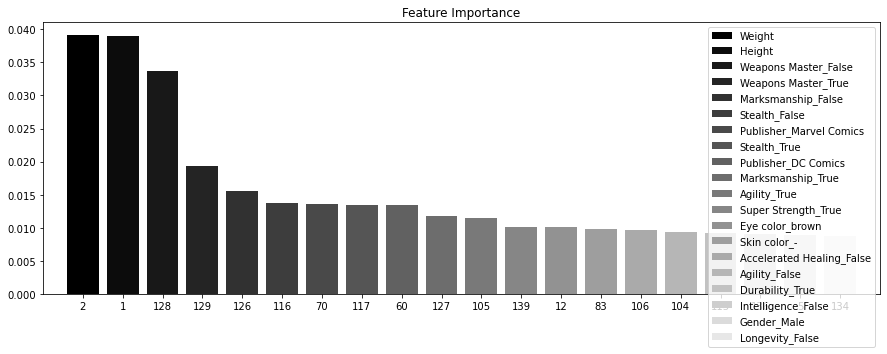

In [400]:
from matplotlib import pyplot as plt
import seaborn as sns
    
rfc.fit(X, y)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importancies of the forest
features = dict()
count = 1
for factor in X.columns:
    index = "f"+str(count)
    features[index] = factor
    count+=1

num_to_plot = 20
feature_indices = [ind+1 for ind in indices[:num_to_plot]]
top_features = list()
# Print the feature ranking
print("Feature ranking:")
  
for f in range(num_to_plot):
    print("%d. %s %f " % (f + 1, 
            features["f"+str(feature_indices[f])], 
            importances[indices[f]]))
    top_features.append(features["f"+str(feature_indices[f])])
plt.figure(figsize=(15,5))
plt.colorbar
#plt.figure(figsize=(15,5))
plt.title(u"Feature Importance")
bars = plt.bar(range(num_to_plot), 
               importances[indices[:num_to_plot]],
       color=([str(i/float(num_to_plot+1)) 
               for i in range(num_to_plot)]),
               align="center")
#cbar = colorbar()
#cbar.solids.set_edgecolor("face")
#draw()
ticks = plt.xticks(range(num_to_plot), 
                   feature_indices)
plt.xlim([-1, num_to_plot])
plt.legend(bars, [u''.join(features["f"+str(i)]) 
                  for i in feature_indices]);

In [356]:
X_important = X[top_features[0:17]]

# Train it on the training set
results = cross_val_score(rfc, X_important, y, cv=skf)

# Evaluate the accuracy on the test set
print("CV accuracy score: {:.2f}%".format(results.mean()*100))

# Accruracy doesn't change much after using only top 18 features

CV accuracy score: 75.61%


In [357]:
parameters = {'max_features': [4, 7, 10, 13], 'min_samples_leaf': [1, 3, 5, 7], 'max_depth': [5,10,15,20]}

gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv.fit(X_important, y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [4, 7, 10, 13],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=1)

In [358]:
gcv.best_estimator_, gcv.best_score_

(RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=3,
                        n_jobs=-1, oob_score=True, random_state=42),
 0.7924242424242424)

#### Extra - For Reference 

In [368]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [369]:
print(model.feature_importances_)

[1.92481515e-02 2.11168969e-02 7.50170667e-04 8.11096354e-03
 9.53312577e-03 7.09854339e-03 5.36055557e-05 1.88447399e-03
 9.24672167e-03 1.74994223e-03 1.60970698e-04 8.72292049e-03
 1.56352994e-04 5.74354680e-03 7.66183449e-07 4.23739552e-04
 2.93990591e-03 9.94952097e-04 6.48749970e-04 2.86906401e-03
 1.14380243e-05 4.33978751e-04 1.31537383e-03 4.85249518e-05
 3.16022832e-03 1.01553938e-04 9.09842845e-05 1.52840347e-04
 7.71667491e-03 3.77429124e-03 8.65967751e-03 0.00000000e+00
 7.42024442e-03 6.91480562e-05 1.05507866e-02 3.47123383e-05
 3.08991178e-03 9.75615173e-05 1.57706093e-05 1.18040781e-03
 6.03354313e-04 7.52136752e-05 0.00000000e+00 5.22893856e-03
 6.93213596e-06 1.51152047e-04 0.00000000e+00 6.35864704e-04
 3.39211760e-03 9.51114616e-05 1.31302811e-04 5.56015072e-05
 1.41427952e-05 2.49272387e-03 1.35339060e-03 0.00000000e+00
 4.91951390e-05 4.04409527e-04 6.11183321e-04 1.64982037e-02
 5.48227189e-03 3.62515048e-03 3.23567640e-05 7.46732182e-05
 5.37423493e-04 7.033687

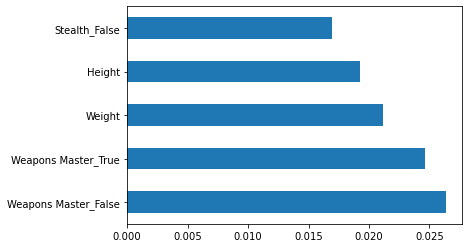

In [370]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [371]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [372]:
from sklearn.ensemble import RandomForestClassifier

In [373]:
regressor=RandomForestClassifier()

In [374]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [375]:
from sklearn.model_selection import RandomizedSearchCV

In [376]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [377]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [378]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

In [379]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [380]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [381]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [382]:
rf_random.best_score_

-0.20343618513323986

In [383]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='Human', ylabel='Density'>

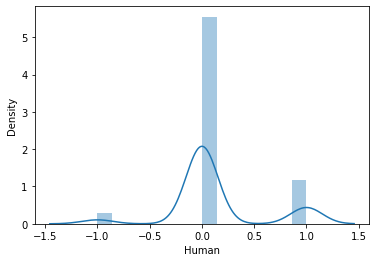

In [384]:
sns.distplot(y_test-predictions)

In [394]:
#initalizing the Adaboost model
classifier = GradientBoostingClassifier (min_samples_split=2,max_depth=3,max_features=None,learning_rate=0.01 , n_estimators = 50,random_state=0)
classifier.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=0)

In [395]:
#predicting values
y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [396]:
#confusion matrix
cm = confusion_matrix(y_test, y_predict)

In [415]:
#sns.heatmap(cm, annot=False)

In [398]:
#Accuracy and Classification report
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test, y_predict))

0.7272727272727273
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       140
           1       1.00      0.07      0.13        58

    accuracy                           0.73       198
   macro avg       0.86      0.53      0.48       198
weighted avg       0.80      0.73      0.63       198



In [ ]:
## checks :: 

In [309]:
# corr_matrix = corr_matrix.stack()
power_cols = data.columns[3:168].tolist()

In [310]:
for idx, x in corr_matrix[tri_df > 0.5].stack().sort_values(ascending=False).iteritems():
    if ((idx[1] in power_cols) & (idx[0] not in power_cols)):
     print(idx,x)

('Race_Human', 'Human') 1.0
('Race_Symbiote', 'Symbiote Costume') 0.8634363833309909
('Publisher_George Lucas', 'The Force') 0.7525567554671455
('Race_Korugaran', 'Qwardian Power Ring') 0.7060661525414638
('Eye color_green / blue', 'Adaptation') 0.7060661525414637
('Race_Human / Cosmic', 'Nova Force') 0.7060661525414635
('Race_Cosmic Entity', 'Power Cosmic') 0.7050178348755625
('Race_Kryptonian', 'Vision - Heat') 0.6722308935793075
('Race_Kryptonian', 'Vision - Microscopic') 0.646789677556471
('Race_Kryptonian', 'Vision - X-Ray') 0.5842534237925744
('Race_Human / Clone', 'Radar Sense') 0.5756496756010625
('Race_Talokite', 'Darkforce Manipulation') 0.5756496756010621
('Eye color_green / blue', 'Power Nullifier') 0.5756496756010617
('Race_Atlantean', 'Underwater breathing') 0.5686938529760092
('Race_Kryptonian', 'Super Breath') 0.5669153683098302
('Race_Atlantean', 'Water Control') 0.5572200404689478
('Race_Symbiote', 'Web Creation') 0.5557518617141941
('Race_Symbiote', 'Camouflage') 0.5

# SuperHero Name Generator - Aayush Sinha

In [405]:
def superhero_name_generator():
    print("Welcome to the superhero name generator:\nTo choose your name follow the instructions below")
    first_part = input("Please enter the name of the city you grew up in. ")
    second_part = input("Please enter the name of your pet or your favorite mythical creature (Ie. Dragon). ")
    #third_part = input("Please enter your core superpower. ")
    superhero_name = first_part + second_part
    print("your superhero name is {}".format(superhero_name))
    return superhero_name


while True:
    name = superhero_name_generator()
    print("If you want to generate another name please press 1 to quit press 0")
    if int(input()) == 0:
        break

print("Go out and save the world,", name)

Welcome to the superhero name generator:
To choose your name follow the instructions below
Please enter the name of the city you grew up in. Dalton
Please enter the name of your pet or your favorite mythical creature (Ie. Dragon). Flash
your superhero name is DaltonFlash
If you want to generate another name please press 1 to quit press 0
0
Go out and save the world, DaltonFlash
